In [33]:
import nltk.stem
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer, PorterStemmer
import numpy as np

In [34]:
mainDf = pd.read_csv("mainJustice.csv")
mainDf = mainDf.drop(['Unnamed: 0'], axis=1)
mainDf

,ID,facts,issue_area,first_party_winner
0,50606,"<p>In 1970, Jane Roe (a fictional name used in...",3,1
1,50613,<p>Joan Stanley had three children with Peter ...,0,1
2,50623,<p>John Giglio was convicted of passing forged...,1,1
3,50632,"<p>The Idaho Probate Code specified that """"""""m...",0,1
4,50643,"<p>Miller, after conducting a mass mailing cam...",2,1
...,...,...,...,...
3283,63323,<p>Tarahrick Terry pleaded guilty to one count...,3,0
3284,63324,"<p>Refugio Palomar-Santiago, a Mexican nationa...",3,1
3285,63331,<p>Joshua James Cooley was parked in his picku...,0,1
3286,63332,<p>This is an ongoing case of original jurisdi...,3,0


In [35]:
documents = []
X = mainDf["facts"]

for i in range(0, len(X)):
  document = re.sub(r"\W", " ", str(X[i]))
  document = re.sub(r"\d+", " ", document)
  document = re.sub(r'\b\w{1,1}\b', " ", document)
  document = re.sub(" \d+", " ", document)
  document = re.sub(r"\s+", " ", document, flags=re.I)
  document = document.lower()
  documents.append(document)

In [36]:
tokenDocuments = []
for i in range(0, len(X)):
    tokenDocuments.append(word_tokenize(documents[i]))

In [37]:
stop_words = stopwords.words("english")

In [38]:
cleanTokenDocuments = []

for i in range(0, len(X)):
    cleanTokenDocument = []
    for word in tokenDocuments[i]:
        if word not in stop_words:
            cleanTokenDocument.append(word)
    cleanTokenDocuments.append(cleanTokenDocument)

In [39]:
mainDf["facts"] = cleanTokenDocuments

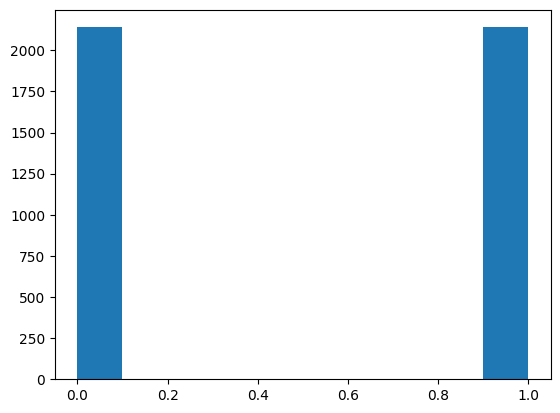

In [60]:
max_size = mainDf["first_party_winner"].value_counts().max() 
lst = [mainDf]
for class_index, group in mainDf.groupby('first_party_winner'):
    lst.append(group.sample(max_size-len(group), replace=True))
balancedMainDf = pd.concat(lst)
balancedMainDf.index = range(len(balancedMainDf))
plt.hist(balancedMainDf["first_party_winner"])
plt.show()

In [61]:
len(balancedMainDf)

4280

In [62]:
lemma = WordNetLemmatizer()

balancedMainDf["lemma"] = balancedMainDf["facts"].apply(lambda x: [lemma.lemmatize(y) for y in x])

In [63]:
postagDocuments = []
for sen in balancedMainDf["lemma"]:
    postagDocuments.append(pos_tag(sen))

balancedMainDf["lemmaPos"] = postagDocuments

In [48]:
balancedMainDf

,ID,facts,issue_area,first_party_winner,lemma,lemmaPos
0,50606,"[jane, roe, fictional, name, used, court, docu...",3,1,"[jane, roe, fictional, name, used, court, docu...","[(jane, NN), (roe, VBZ), (fictional, JJ), (nam..."
1,50613,"[joan, stanley, three, children, peter, stanle...",0,1,"[joan, stanley, three, child, peter, stanley, ...","[(joan, NN), (stanley, VBD), (three, CD), (chi..."
2,50623,"[john, giglio, convicted, passing, forged, mon...",1,1,"[john, giglio, convicted, passing, forged, mon...","[(john, NN), (giglio, NN), (convicted, VBD), (..."
3,50632,"[idaho, probate, code, specified, males, must,...",0,1,"[idaho, probate, code, specified, male, must, ...","[(idaho, JJ), (probate, NN), (code, NN), (spec..."
4,50643,"[miller, conducting, mass, mailing, campaign, ...",2,1,"[miller, conducting, mass, mailing, campaign, ...","[(miller, NN), (conducting, VBG), (mass, NN), ..."
...,...,...,...,...,...,...
4275,52125,"[village, schaumburg, illinois, adopted, ordin...",2,0,"[village, schaumburg, illinois, adopted, ordin...","[(village, NN), (schaumburg, NN), (illinois, N..."
4276,62702,"[varsity, brands, inc, varsity, designs, manuf...",6,0,"[varsity, brand, inc, varsity, design, manufac...","[(varsity, NN), (brand, NN), (inc, NN), (varsi..."
4277,53030,"[national, gay, task, force, filed, facial, co...",2,0,"[national, gay, task, force, filed, facial, co...","[(national, JJ), (gay, NN), (task, NN), (force..."
4278,54462,"[sections, cable, television, consumer, protec...",2,0,"[section, cable, television, consumer, protect...","[(section, NN), (cable, NN), (television, NN),..."


In [64]:
words_set = set()
 
for doc in balancedMainDf["facts"]:
    for word in doc:
        if word not in words_set:
            words_set.add(word)
     
print('Number of words in the corpus:',len(words_set))

Number of words in the corpus: 18897


In [66]:
lemmaWithSomePostagDocuments = []
for sen in balancedMainDf["lemmaPos"]:
    lemmaWithSomePostagDocument = []
    for w in sen:
        if w[1] != "UH" and w[1] != "WP" and w[1] != "WP$" and w[1] != "WRB" and w[1] != "PRP" and w[1] != "PRP$" and w[1] != "MD" and w[1] != "WDT":
            lemmaWithSomePostagDocument.append(w[0])
    lemmaWithSomePostagDocuments.append(lemmaWithSomePostagDocument)
            
balancedMainDf["lemma"] = lemmaWithSomePostagDocuments

In [67]:
words_set = set()
 
for doc in balancedMainDf["lemma"]:
    for word in doc:
        if word not in words_set:
            words_set.add(word)
     
print('Number of words in the corpus:',len(words_set))

Number of words in the corpus: 16938


In [70]:
words = []
freqOfWords = []

for doc in balancedMainDf["lemma"]:
    for word in doc:
        if word not in words:
            words.append(word)
            freqOfWords.append(1)
        else:
            idx = words.index(word)
            freqOfWords[idx] = freqOfWords[idx] + 1

In [1]:
words = []
targetVar = []
for row in range(0, len(balancedMainDf["lemma"])):
    for word in balancedMainDf["lemma"][row]:
        words.append(word)
        targetVar.append(balancedMainDf["first_party_winner"][row]) 

NameError: name 'balancedMainDf' is not defined

In [77]:
d = {'words': words, 'first_party_winner': targetVar}
df = pd.DataFrame(data=d)